<a href="https://colab.research.google.com/github/edoocosta/helloworld/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados

### Imports

In [1]:
!pip install polars

In [3]:
import pandas            as pd
import numpy             as np
#import polars            as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

### Load Data

In [19]:
df = pd.read_csv('dados_enem_2021_BA.csv')

In [20]:
df.shape

(266194, 51)

No Pandas podemos carregar dados de diferentes formatos. Os principais são :
* CSV
* Excel
* SQL

Usando PySpark um formato muito utilizado é o parquet. Veremos este ponto mais adiante.

De igual modo podemos escrever os arquivos em diferentes formatos (output).

Na prática o formato de dados que iremos trabalhar vai depender muito da origem dos dados, da estrutura da empresa que estaremos trabalhando, etc.


Para saber mais clique [aqui](https://medium.com/analytics-vidhya/python-pandas-data-input-and-output-297725432339).

### Microdados ENEM

Grupos de variáveis
* Dados do participante
* Dados da escola
* Dados do local de aplicação da prova
* Dados da prova objetiva
* Dados da redação
* Dados do questionário socioeconômico

#### Desafio :Elaborar um gráfico de pareto com os estados e as maiores notas.

### Inspeção de Dados

Hipótese levantadas

*   Padrões espaciais afetam o desempenho escolar?
*   Características municipais afetam o desempenho escolar?
*   Renda familiar pode afetar a nota dos alunos?
*   Há diferença de desempenho entre escolar públicas e privadas?
*   Qual matéria tem maior nota naquela região?




*   Padrões espaciais afetam o desempenho escolar?
*   Características municipais afetam o desempenho escolar?
*   Renda familiar pode afetar a nota dos alunos?
*   Há diferenças de desempenho entre escolas públicas e privadas?
*   Qual matérias teve a maior nota por região?





In [9]:
# leitura das 5 primeiras linhas
df.head(n=10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
6,210053741476,2021,6,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,453.4,438.3,503.4,379.5,BCDBECADBCCDCEBBBCEDCBCEBACDBEEAEDCDBCAACEEBD,BDDCABAEEAABECBBCBEDBEA

In [10]:
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
6,210053741476,2021,6,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,453.4,438.3,503.4,379.5,BCDBECADBCCDCEBBBCEDCBCEBACDBEEAEDCDBCAACEEBD,BDDCABAEEAABECBBCBEDBEA

In [11]:
# leitura das 5 últimas linhas
df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
6679,210053595952,2021,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,473.1,435.1,394.8,581.4,DEEACDAAEDCAAADAACAAABBDABBAABBCEDCABACAAAAAD,ABDECADACABBADAADBDAAACAAADBDABDCAACCBBBCBAAA,99999ACDABAAACDAAACEAAAACAEBCAABADEADBBDAEBCAD...,DABCAACADABBADACBADEBBADAAEACECCCAEBBBEDABAEA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
6680,210051453648,2021,7,F,0,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6681,210052360681,2021,2,M,0,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,481.6,469.9,475.8,422.2,EADAACAAADBDBCCBCAAEABCBECDDEABDDEBDCDEBBADDA,ABDBABEBACBDEADADACECBEAADAABCACACCCADACCEEDE,EAAAE99999ADADCEACEBBCBACAAEDAADCAEBCBCEAEDBAC...,BEAAECAACDAABBECBEDDCBADAEEBBACBBABDBDEBCEDCC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,80.0,100.0,120.0,520.0
6682,210052694129,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925105,Poções,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,455.5,347.1,493.7,413.3,CCBCAAEBADDDBBECACBABDCCDEDBCBADABBAEBABEECCC,CBBBDDAADBDCDCCDCBBABDAECBEBBCBCBDADBCBCACADA,99999CCABEBADAEDBACDDBEADDACAAEADBDBBDECAEADEA...,BBBCADBCACACBBEBDBEEABCACDACBBCDBCBBCBBACBEDB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,140.0,120.0,120.0,140.0,640.0
6683,210051382796,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2924009,Paulo Afonso,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,507.2,472.3,463.6,485.4,ADDAECABECECDBDEAAEACACCEABECBBEEAACCDDDBBEDD,DAEDECCAEADDBDABDCAACAACBBBCDEAAABBCBEBEEDECA,99999CBAAEDCDCDCBAADDCEDBBBEBEBBADCCAEEDDECEEB...,DCBDEEBAACCECAACDEEBAECECAEABDBADBBDDBBABDBBB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
6674,210053775264,2021,2,F,1,3,1,2,0,2,1.0,0,2933307.0,Vitória da Conquista,29.0,BA,2.0,1.0,1.0,2933307,Vitória da Conquista,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,431.5,454.6,468.4,415.7,ECBEECCDBCDDCCAABAECAECDCCBEDECCBBAECCEEDBAEE,CBCBDCECBACAEADEDBBBCAAEABACACEAAABCADCCBCBCC,ACAAA99999CCBBDDEDDDDCAACCCADDDCBCEDCBBDCCDBAC...,DBABDACACDBCBCEDDDDDBCBACEDDCCCEBBCEADCBECADD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,140.0,120.0,620.0
6675,210051137802,2021,7,M,1,2,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,648.0,594.4,556.5,710.6,ABEDCDBCDACBDCECBADAABCDADAEEBEBEDDCBDAAEDECE,BDACDCDBAEBBEBBAEAEABCECCCBCAEAEAACBBAABAADDC,CDADA99999BCDDEADEDDBADACBBBEEBDCCACDCBDBAAACB...,BDCABBACEEDBEBCCADAEEBDCEABCCBDCACDDEDEAADBEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,180.0,180.0,200.0,920.0
6676,210053354239,2021,3,F,1,3,1,2,0,2,1.0,0,2924009.0,Paulo Afonso,29.0,BA,2.0,1.0,1.0,2924009,Paulo Afonso,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,396.7,427.8,387.4,446.1,CDDADCABCCBADCCBDAECBAACBCBCBDDDDBDCDBCBBADCE,AABBDDBDCACDBAACBEADCBBCBDEBCBABABBBEBCABCBAB,EBBAA99999DDEADDBBBEBDBAACCDBADBDDDAADBEBBBDAC...,BABBCBABABABBBAABADBDEDDBABDBAAEBBBCBBBCBBAAC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0
6677,210051939162,2021,8,F,1,3,1,2,0,2,1.0,0,2910057.0,Dias d'Ávila,29.0,BA,2.0,1.0,1.0,2910057,Dias d'Ávila,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,419.2,408.0,399.8,409.3,DBBDCDEDEBBDABECDCBACEDABDACCEADCBABACADAEBCE,CBACBCACBBACACCBA*AACBCAABCACAAABCABBBEAEADEA,BBCEA99999AEEABBEABEDAAEBCCEBEABDEBDBAEABADDCA...,BABADBDBDEECACDBEBEDAEBDCEBABEDEBDECDCEBCBDCB,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,80.0,120.0,60.0,100.0,0.0,360.0
6678,210052010159,2021,3,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913606,Ilhéus,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,397.2,530.5,491.9,411.8,BBEAEBBADECECECACCECDDCEDEBADADCEBCECDCEAEBCA,CEDCDCBBADAAEDBACEEDBDACCEECEEAADABDBCBDACABC,EADAB99999DBCDEADCCECAECCEBBDABCDEBADEBCDADDEA...,DBCCBADBDBEADDCAAACACAEDBADACEBABAEACBACBACCE,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,80.0,560.0
6679,210053595952,2021,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,473.1,435.1,394.8,581.4,DEEACDAAEDCAAADAACAAABBDABBAABBCEDCABACAAAAAD,ABDECADACABBADAADBDAAACAAADBDABDCAACCBBBCBAAA,99999ACDABAAACDAAACEAAAACAEBCAABADEADBBDAEBCAD...,DABCAACADABBADACBADEBBADAAEACECCCAEBBBEDABAEA,1,ADCDCDBB

Nota: os comandos `df.head()` e `df.tail()` são úteis para inspecionar e compreender o dataset.

In [18]:
# quantidade de linhas x quantidade de colunas
# o resultado é uma tupla - podemos verificar com a função type()
df.shape

(6684, 51)

In [21]:
# Sumário do Dataset
# número de valores não nulos, dtype de cada coluna, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

In [24]:
# verifica missing (dados ausentes)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

TP_DEPENDENCIA_ADM_ESC    82.035658
CO_UF_ESC                 82.035658
TP_SIT_FUNC_ESC           82.035658
TP_LOCALIZACAO_ESC        82.035658
SG_UF_ESC                 82.035658
CO_MUNICIPIO_ESC          82.035658
NO_MUNICIPIO_ESC          82.035658
TP_ENSINO                 68.298309
CO_PROVA_MT               34.124736
CO_PROVA_CN               34.124736
NU_NOTA_MT                34.124736
TX_RESPOSTAS_CN           34.124736
TX_RESPOSTAS_MT           34.124736
TX_GABARITO_CN            34.124736
NU_NOTA_CN                34.124736
TX_GABARITO_MT            34.124736
TX_GABARITO_CH            30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP5             30.560418
CO_PROVA_LC               30.560418
CO_PROVA_CH               30.560418
NU_NOTA_COMP4             30.560418
NU_NOTA_LC                30.560418
NU_NOTA_COMP3             30.560418
TX_RESPOSTAS_CH           30.560418
NU_NOTA_CH                30.560418
TX_RESPOSTAS_LC           30.560418
NU_NOTA_COMP1             30

In [26]:
# nome das colunas
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [25]:
# Sumário estatístico dos dados
# 25%: Primeiro Quartil
# 50%: Segundo Quartil (Mediana)
# 75%: Terceiro Quartil
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,266194.0,2.100527e+11,981957.687860,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,266194.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,266194.0,5.710166e+00,3.878161,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,266194.0,1.048991e+00,0.411030,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,266194.0,2.301832e+00,0.907761,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,266194.0,1.029787e+00,0.194507,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,266194.0,1.595810e+00,0.719902,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,266194.0,2.846845e+00,4.468500,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.500000e+01
TP_ESCOLA,266194.0,1.379663e+00,0.570947,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,84388.0,1.013272e+00,0.114438,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [27]:
df.index

RangeIndex(start=0, stop=266194, step=1)

In [28]:
# Quantidade de valores únicos por coluna
df.nunique().sort_values(ascending = True)

NU_ANO                         1
SG_UF_PROVA                    1
CO_UF_PROVA                    1
TP_LINGUA                      2
TP_SEXO                        2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_ENSINO                      2
TP_PRESENCA_MT                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_CN                 3
TP_PRESENCA_LC                 3
TP_ESCOLA                      3
TP_SIT_FUNC_ESC                4
TP_ST_CONCLUSAO                4
TP_DEPENDENCIA_ADM_ESC         4
TP_NACIONALIDADE               5
TP_ESTADO_CIVIL                5
TP_COR_RACA                    6
TX_GABARITO_CN                 8
TX_GABARITO_CH                 8
TX_GABARITO_MT                 8
TP_STATUS_REDACAO              8
NU_NOTA_COMP2                 10
TX_GABARITO_LC                10
NU_NOTA_COMP4                 11
NU_NOTA_COMP3                 11
NU_NOTA_COMP1                 11
NU_NOTA_COMP5                 11
TP_ANO_CONCLUIU               16
CO_PROVA_C

In [29]:
type(df)

pandas.core.frame.DataFrame

### Selecionando colunas

In [30]:
# seleciona uma coluna
df.TP_ESCOLA

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [31]:
# distribuição de frequência
df.TP_ESCOLA.value_counts()

1    177170
2     76984
3     12040
Name: TP_ESCOLA, dtype: int64

In [32]:
# seleciona uma coluna
df['TP_ESCOLA']

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [38]:
# seleciona uma coluna
# .loc[] : seleciona colunas pelo label
# sintaxe: df.loc[linhas:colunas]
df.loc[:, 'TP_SEXO']

0         F
1         F
2         F
3         F
4         M
         ..
266189    M
266190    M
266191    M
266192    M
266193    F
Name: TP_SEXO, Length: 266194, dtype: object

In [39]:
# seleciona múltiplas
df[['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [40]:
# seleciona múltiplas colunas com .loc
df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [41]:
# .iloc[] : seleciona colunas pela posição
# sintaxe: df.iloc[linhas:colunas]
df.iloc[:, 0]

0         210051128744
1         210054173438
2         210052118573
3         210052350230
4         210053156861
              ...     
266189    210051432069
266190    210051106175
266191    210051995005
266192    210053234415
266193    210054027870
Name: NU_INSCRICAO, Length: 266194, dtype: int64

In [42]:
# exemplo de seleção com .iloc
df.iloc[0:5, 0]

0    210051128744
1    210054173438
2    210052118573
3    210052350230
4    210053156861
Name: NU_INSCRICAO, dtype: int64

Com a função `.select_dtypes()` podemos selecionar colunas de acordo com seu dtype (int, float, bool, etc.). Em várias situações isso pode ser útil, dentre outras coisas para aplicarmos rotinas específicas de acordo com o dtype ou ainda separar as colunas em qualitativas e quantitivas.

In [43]:
# seleciona colunas numéricas
df.select_dtypes(include = [int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# outra forma de fazer:
df.select_dtypes(exclude = object)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# seleciona colunas str
# df.select_dtypes(exclude = [int, float])
df.select_dtypes(include = object)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,F,NaN,NaN,Ruy Barbosa,BA,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
1,F,Salvador,BA,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,NaN,NaN,Barreiras,BA,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
3,F,NaN,NaN,Santo Estêvão,BA,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,M,NaN,NaN,Feira de Santana,BA,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,M,NaN,NaN,Alagoinhas,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,M,NaN,NaN,Juazeiro,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cat_cols = df.select_dtypes(include = object).columns.tolist()

In [51]:
num_cols = df.select_dtypes(include = [int, float]).columns.tolist()

### Filtro

Existe diferença na nota de matemática entre alunos de escola pública e privada?

In [54]:
# alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

487.37504991538157

In [55]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

579.8338996340826

In [56]:
# alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

In [58]:
# alunos de colégio pública
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [59]:
# 1 condição
df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
175054,210051176595,2021,5,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905701,Camaçari,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157016,210054200324,2021,4,M,1,3,1,2,0,2,1.0,0,2933307.0,Vitória da Conquista,29.0,BA,2.0,1.0,1.0,2933307,Vitória da Conquista,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10457,210053777211,2021,3,M,1,3,1,2,0,2,1.0,0,2918803.0,Laje,29.0,BA,2.0,1.0,1.0,2922409,Mutuípe,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,488.5,438.5,498.5,579.1,BABCDBEBBECADCADBAECEDCDDCABEEDAABCBCABCDEDCE,EABDCBEBBADEBDEBACCBEBDBDEECDBACEBBCBBBACDACB,99999DCACCDCDBAEABDAEEEABCDBAAEDBBDCDAACCDADAC...,BCDAEDBDDDEDCBACDBADBEACEDDEDBABCEBDBCDBCBDEA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,140.0,180.0,140.0,800.0
221807,210053757521,2021,2,M,1,4,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913705,Inhambupe,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,533.0,450.5,411.7,428.3,DDEBEBEBCCBDBDBAADCABEEBBDBCEABBACEDCEAADBAEC,CEADEAECBBDBBAEDABBDCCAAEBBDACB*EBEDACECACBDE,AEDAB99999BDBCBBDEACEACDBBAEDCBCBBAEDBAAAEBCDE...,AEBEECAECDCDCCEEABCADDEBCDABDBCABDAABEDDABACE,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,100.0,120.0,120.0,540.0
212884,210053798197,2021,2,M,1,3,1,2,0,2,1.0,0,2911907.0,Iaçu,29.0,BA,2.0,1.0,1.0,2914703,Itaberaba,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# validando a nossa consulta
# .unique(): retorna os valores únicos de uma determinada coluna
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

Agora vamos retornar um subset com os alunos do sexo Masculino que sejam treineiros. Neste caso usaremos o operador & (`AND`).

In [62]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
69,210053707047,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902104,Araci,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,521.7,566.7,569.5,702.3,DDD*CEEDECBBEACBAACABEDCEACEEEABCACCCCBDBEDED,DDEDEBCAEDCCBBBEACABAEEADBABCDABBDECBEBACAEAC,ABACC99999DAEADCBDACDDCACDDACADAAEDCDACDDCDACE...,CCEDEBCCDDCDBEBCCBCAEAABDAEEDCEADDABDBABCDACB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,160.0,200.0,180.0,900.0
113,210051127853,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2932903,Valença,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,494.4,408.4,504.1,483.3,CBECBCEBEDBADCEBADABBAACBDBAEBBEDCBDAEBDBEBCE,ECEBADDABBACCCBDADEECACABCACBADCBAEACCCAABBCA,BACBA99999CECACBBACCBBEDAEEBADEBEEBACDACACEACD...,AACBCACDDBABCDCBDADBDCEDDBBDACECBDDCADCECBDCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,140.0,160.0,660.0
151,210053634740,2021,5,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,210052073811,2021,1,M,1,2,2,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911204,Gandu,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,210053593141,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,541.6,646.9,510.6,601.0,AEDDABDEADBDEBCAADDCBBCCDCBADECACCDDCEADBCACA,BCECCAEABABCEAEBAACAEDEBBEBABCBBAEEBBEDECBBBA,DACAC99999ACBDDEBEEBCCBBCEAAADAAADAECDEBADCBAA...,CADEEBDDDCBBCBBBBEDDCDAABDBABBEDCCCDDDDBDBCAC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,40.0,40.0,140.0,40.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265284,210051161032,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928703,Santo Antônio de Jesus,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265325,210051362311,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2904100,Boquira,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265359,210051833040,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2923605,Paramirim,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265994,210054130477,2021,4,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2924009,Paulo Afonso,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
54083,210053350183,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928703,Santo Antônio de Jesus,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,560.8,573.4,523.1,465.5,EAEDABECABDDECCCEABAEECEACEEDCEBACCDCDCDCBDAA,BEECCBBBEACAEADEABCDEDEBBCCABCBBBCACCBECCDCBC,99999AAEAEBABDDADCDDAEBDACEDBDDBCDEEEBEAAABECA...,CABEBECBCABEDEEBDAEDCAABACBAABABCDEDDCCAEBDAE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,40.0,120.0,120.0,120.0,500.0
44736,210053693355,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907509,Catu,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,563.7,638.4,626.7,659.9,BAECACBEABACADCCBABEAECDDDDDCCECACEBCDCBBABAE,EEEBCCEBDAEBEAEDAAEEBBEBBDADBDBBADEDBBAECDBBA,ABBAC99999CDBECABABBAEBDCDCBEDDBBCDECBEAADBDAE...,EADEBBDDDEDCABCBBDEBACDBCAEBCCBDAECBDCBADECBE,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,180.0,120.0,120.0,140.0,720.0
238019,210053071138,2021,3,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,457.1,519.7,406.9,431.3,BDDCEADBECCEBDCDEABABBCADDEBAEDCDDBACCDBBADEE,CBBAEDCBEAECEDBCBBDCAEACBEECEACABCDABABCCAECA,DBDAB99999CEBADDACDCDBBADBCEBADECDCBBBCACCBECD...,DBEBEEDDCBDACABADDBABEABCDBEBCADECDEBDAACEEDB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,100.0,120.0,120.0,540.0
161669,210051668953,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2916401,Itapetinga,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,598.4,353.2,563.4,494.3,CCDEBCABDBEAEEDCCCCCCEAABBDDBCDCCCEABABACECAC,BBBBCAEBCADBCABDDABCC.BBBDDACEAAAACCADDDDEDCD,99999EAACACBADCDBDBCBAEDDEADAAEADEBBDCACCDDDDB...,AAADCCBEDCDCDCCABBCDDBECCCABBDABBACDDEBCBCDBB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,120.0,160.0,160.0,660.0
119663,210052617907,2021,1,M,1,4,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,594.1,603.9,550.4,649.6,BEEDADBDABCDBCEBCDEBBEEBBCBDEEBDADACCDCEBAAAB,BBACCAEBBBCDBADCAABADBABECADBCBAABECBBDACCCBA,AABAB99999CDDDDAEEBBDADBEEDBDDBCBCADEBEDBCABBB...,CEBEECDDCEECDBBBBCDBABBEDDACBBACEDDBDCECDDEDE,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,4.0,0.0,0.0,0.0,0.0,0.0,0.0


Se o objetivo fosse retornar os alunos do sexo masculino ou que foram treineiros, poderíamos usar o operador | (`OR`).

In [69]:
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
126380,210053593581,2021,8,M,1,2,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165022,210052433320,2021,2,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2931905,Tucano,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,546.6,529.2,544.7,539.6,EAEBABEDCBEAECBBEAEBAECCADBACDDDDBDCCABCDAABE,DDEECDCCCBCAEAEDEAAAEDEBACABBDAEBDACBEAECECBD,AACAB99999CDBBECEBDCACBEAEECADDBBCEDEDEAACCDAA...,EAEEEECEAEACABECDEDEACEDCBBDCDAEDCADCCCEDBECE,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,180.0,120.0,120.0,200.0,780.0
904,210053099605,2021,4,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186447,210053297605,2021,4,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905701,Camaçari,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51124,210052426523,2021,1,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928703,Santo Antônio de Jesus,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,431.3,469.0,480.7,440.0,BABEDBADDDCBAECCACBACCEEDDAACCCDECDDADBBDEAEE,EDEEDCAECABBEBAACCAABAABDBEDDAAEEACBECEBCADCA,DEBAC99999DBDAEADCDAADDDCDBCEACACCDDDDEDBCCAAB...,ADDDBDAEDBAEEACAECADABCAAADBAEEBAAECBCEDEDCCB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,100.0,120.0,120.0,640.0


Outra sintaxe:

In [65]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [64]:
# cria uma máscara booleana
mask = df.TP_SEXO == 'M'
mask

0         False
1         False
2         False
3         False
4          True
          ...  
266189     True
266190     True
266191     True
266192     True
266193    False
Name: TP_SEXO, Length: 266194, dtype: bool

In [66]:
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
7,210053790986,2021,1,M,1,1,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907202,Casa Nova,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,590.9,659.7,593.6,586.8,BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE,EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB,ACBAB99999DCEADCADACBDEAEDDABDADCBBBDABCDDDECB...,DDEBEEEDDDCAEEBACBEAADDDCCEDEEBABEECEBEEBCAAC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,160.0,200.0,200.0,900.0
9,210054171092,2021,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,210052237624,2021,5,M,1,2,1,2,0,2,1.0,0,2910503.0,Entre Rios,29.0,BA,2.0,1.0,1.0,2910503,Entre Rios,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,594.4,572.8,536.6,469.6,DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD,BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA,ABBAB99999ADDBAABABCBBBACADAEDBBCCEEEBEAACCDBE...,DABEACCEACAACBBABBBACCAACBBAAECBBCBEBCCCBABBD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,100.0,80.0,80.0,80.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN

In [67]:
df[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
158309,210053730866,2021,8,M,1,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911709,Guanambi,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100608,210052953187,2021,11,M,1,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,542.1,575.8,478.0,532.6,ECBAAEAAECEADEDDCEBAEEEAECDEBCDDACDAADCAEEDCB,ABAAAAEAADABCACEEBDAAEAEACACCAEEEEBEDCBBCBABC,99999DACDCBDAAABEBADBAEEDEDDAAEADEBBBCBAEAAADD...,ABADCDEEAEACEDDBCBDEEAEDABCAADAECDCACBBEACCEA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,140.0,120.0,120.0,60.0,560.0
244703,210053299723,2021,8,M,1,3,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910727,Eunápolis,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31300,210053765568,2021,3,M,1,3,1,2,0,3,1.0,0,2933307.0,Vitória da Conquista,29.0,BA,4.0,1.0,1.0,2933307,Vitória da Conquista,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,459.4,471.2,465.6,552.3,DCEECDBADDCABCEBADEACDBEDACBECABECCDBDEADBCAB,EAEAADABCBEBADACEBEAABECCDABCDAEBEDADECAABDAB,CBCDB99999BCDBAADCEBADEDCDBCEACEDABADDDDEBDAAC...,DDACBEDEACBDCEBEDBCAEBCDACEDDBECABECDBEABCACA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,100.0,80.0,120.0,80.0,500.0
35395,210053339524,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918001,Jequié,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,567.1,647.0,637.2,694.2,CCCEDBAAACBAEEDEECACBEADBDDABCCEBCBACAADBECDA,CCBBDEECBBABEECEBAAAAEBCACADABBEDABBCCADABADC,ABBCD99999DDEACBCADABBCEBABBACEADEBABAACEAAADB...,ECCCAEBDBDDDDCDDEDBAABDBAAEDBBBCBACAEBDBADCBA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,160.0,200.0,880.0


In [68]:
df.loc[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
165068,210053289030,2021,3,M,1,3,1,2,0,2,1.0,0,2927507.0,Santa Bárbara,29.0,BA,2.0,1.0,1.0,2930501,Serrinha,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,430.1,506.9,493.2,573.6,ADCDDEDADDDDCDECEAECAEDEBCCDDBEBEBEDCDDADCBDA,DCCECAEBBACCDABDABAACDADBACABCBBADADCBDEBAADB,ABCDA99999CAADAECECBDDBCCBDEDEAACEAECDEAACDBBE...,EEEEBEEDECDAABEAECDACDBBDABDBCCBBCBCEDBBABBCB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,120.0,120.0,120.0,580.0
189417,210054174987,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914604,Irecê,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,513.1,529.0,459.8,564.1,ACEACBDDDCDDBACCAEBDADBEBAEACDCAECBCBCBBEEBAA,BDCCCBADADCADBECDBEADCECCAABAAAEBDBBDAABADDEB,99999CACACDEDDEADCBCEBBDAEABDAABAABECDBADBEECB...,DEACDCCEDEDECCBAAEBDEAADEBACCBEAABBCBCEEAECCA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
28484,210051795038,2021,13,M,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918001,Jequié,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40408,210053058719,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906006,Campo Formoso,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,552.2,594.4,547.9,557.2,CCACCDCCCDECECCCEACCBDDAEEDCBEBCBCDBBECBBEDBD,DBBAAEBECDABCACDAABAADACACCEABDCBEBABCABCDAEC,ADBCA99999DABADBEEACCCEADCCDABEADEDBDBACCDDDCD...,BCBCDCBCECBCEBDBCDDDBEECCDCBDBCCEBACCCEEDECDA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,200.0,180.0,900.0
116494,210053369696,2021,2,M,1,1,1,2,0,2,NaN,0,2925501.0,Prado,29.0,BA,2.0,1.0,1.0,2925501,Prado,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,424.6,535.4,450.6,392.7,DCDDECDBACDEBABBAEEEBEBDAAACABACCDEEECBCBBCCD,DBEDCCBDCAEBACACECACAABDBEDDCDADEBBDBCEBCBEAB,CEABD99999DEEECDABEDBAEAEADBCAABAEDAABACADCACC...,BACDAAEACBBACDAABCACDAEECDADBDCCADDBCCAADCDCD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,100.0,80.0,100.0,120.0,480.0


In [70]:
df[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
175726,210052663694,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911600,Governador Mangabeira,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,560.7,471.1,482.6,399.6,DABCCCEAEDDADEDDEBABABCCDAAEDCACAEACCDABBACCE,AACAEACDECDDDCBEEEEBADACACCEEEBAEBACEEBEEAABE,99999DCADADEDCDDBDDADBEADBEECCEDABDCDEBACBBBCE...,DDDEBAECDDBACCCEACABBEBBDADBABBDBCCBDCBACCDAD,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,120.0,80.0,100.0,80.0,480.0
173935,210052376109,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926707,Rio de Contas,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,503.6,557.8,497.6,523.3,EDBBABBAEABCAACCAABDCCAABEABBAEDECDCAEABBECCE,CDABADACBCABAEBDAABCACAEACECCCACBEBBCADBCEEBB,AEDDA99999BABABDBAADDBDEDEDAAEAADABBDEBACEDBCD...,BABAADDADBDCCCDDCBBEBCDCCABCBAADDBBAEDBCADBBD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,140.0,120.0,120.0,120.0,160.0,660.0
198319,210053349450,2021,1,M,1,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,512.2,555.9,576.5,504.0,DDECBEEAADDACECDEEEABEACEADBEBCDACDDCBCCBBBBD,CBEBCBCABCEBEACACAAECBEBADCDDBBDDBADBCACCBBBD,AEAAC99999CDADBAACCBCEBBEEDDDDDBBEADEAEABECDAD...,DADEDDBEDCECBEECEEDBBBDBCCDDBEDBBEBABDBACDEBE,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,140.0,120.0,620.0
148006,210052700815,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,434.6,348.3,337.0,452.2,BBBDEBCACDDEECCCDDECAACDEBEEDDDDDDCECCBDCACBA,CCDCCBAADCBDACAADBEDABBDBDBCAEADCAADDADDAAAAC,CAABA99999BBDCDDADECACACDCDDADDDCEDDABBEBADEDB...,DAAEEEBECCAAADEAEBCCBCDADCEACDCCCCDDDACECDBDC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,80.0,100.0,20.0,420.0
112944,210051148261,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918209,Jiquiriçá,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,404.7,411.6,427.8,637.8,BADDBCBBAEBEADAAABCDBCDBBADBECDDAEBBECCDAAABD,ADCEBAEBDCBAACBCDCEBADBCCEBDADABACBCACEDCEBDB,99999BACCCADBBACADABDACBBAEDBADCBDDACBCEECCBDB...,AABECEBECEBCCDCCDEABCCAADBAEBCBBCDADDCEADBCDC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,120.0,120.0,160.0,80.0,640.0


In [71]:
df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
66885,210054027932,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,415.6,499.9,472.4,594.2,DDCDABDACCCCDDBDEBECBDDBDCEEACECBDACCBABCEBEA,DCBEEAECBADBBAABABBAAABEBDDCCDDBDEDDADADCABBA,ABAAC99999DADAEDDBDCBBEBAACEBCDBAEDAEEDCDCCCAA...,CBAACBEBCEBCBEAACBEBEDADCBBDCBCBDDAEDEDCCBDEB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,100.0,120.0,120.0,580.0
177796,210051854491,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,514.4,484.8,488.4,541.4,DAECCDBEDBCAEDDCAEEBABCEADEACACAEBDDADBEBBECD,BEEADCABEACBDBEDEACAAEDECA*BCEDDCABCDAABAAEDD,BADEE99999BDCCEBDEDCDABBDACCEECDBABACDBCCEADEB...,DBACEBCCBBECBEBAAEDABCAEADECDCCECDBCADEDBDEBA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,100.0,120.0,80.0,540.0
193132,210052933154,2021,1,M,1,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2931350,Teixeira de Freitas,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,545.3,614.7,566.3,663.1,AADCEEEBECCECDABEDCECECCDDABADDCEABECDADBECCD,AAEADBEAEACCBABCECBBAEEDBEDBCBCABCBEDEBBCACAB,ABBBA99999DEEACDADACEEECBDDEDBBEADECDAACEBACCA...,DDCAEADCDDBCDDACDECCBDADDCAEBEAAADCCABADBBBBE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,120.0,120.0,160.0,160.0,700.0
214193,210052519801,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,390.8,388.2,421.0,539.0,DBDCBCABCABADEDADAEAACDDBBACCCEAECEABDEBABEDD,EBCADBAECBCADEBBDBCEDBCDACDBECCAEDCBBEBCADECE,99999DADAACBDDDDAEEBCBAAAADEBCAACBDEDCBAABDADB...,CDDCBABECACDABBBBEAECAEECCDCDBEBACECADEEBBBBD,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,80.0,60.0,60.0,100.0,20.0,320.0
108035,210053248529,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,589.4,610.3,598.5,631.1,BDEDABDCAD.BECCDCACBBEC.CEEDADECEAADCECDBABEA,BCCCCAEEADDBCAEDEEAADDEBBBDADCBAACEDBBAECAACA,ABAAC99999CEADCACEBDDBBDCBCCADABBEEDEEEAEECDAA...,EADEAEBDCCCCABDADBDEBDBEDABEADCBEDEEACCDDD*BA,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,120.0,100.0,120.0,120.0,600.0


Uma forma alternativa:

In [72]:
condition_1 = df.TP_SEXO == "M"
condition_2 = df.IN_TREINEIRO == 1
df.loc[(condition_1) & (condition_2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
5796,210052992255,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930105,Senhor do Bonfim,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,481.8,575.1,574.1,547.7,CBBEBDAEDCBDEEBCCABEDCAADBBCEDADACEAAEBCEBA*C,DBBEADECDBEBBCCCBBDEADCEACEEEBDDDABADBABABAEC,ABCCD99999BDBABCCADABBEEDECBACEADEBABAACBABAED...,AACCDABDDCDCEBEDABEADCEEBDDBEEDACDDAABEECCADD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,200.0,180.0,160.0,900.0
170085,210054098862,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,605.8,571.9,572.2,631.4,DAACBCEDEEBACADBADDBCEBCAABCBEACEACCCBCEBBCCC,CEADEAECBAAEBABBECBBDBEBBCACCDADBCDABEDBAAABA,ACAEB99999DAEADCBDACBEEABDBACDEDDEDCEECCEBCCCB...,CCCAEEEADECCDDBACCAEAAADDCCCCCDAEBEBABABECDCD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,120.0,120.0,160.0,140.0,700.0
61863,210052121339,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,Itabuna,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,455.7,583.8,523.3,657.1,BAACABBBABBCBBCABDDCCECBECCDEDDEDAACBCBDDBDBE,BDEBCAADBADAEAECEAAAEDABBECABBBBADADBBDBCDBDB,99999AACEAADADEADECDCEAECCDDAADABEADCAECADCB*C...,CADEEADDCECACBCDDBCECABEDDABBABDBDCACCEDBDCCE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,140.0,160.0,660.0
97588,210054127042,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,470.8,599.8,543.8,625.1,ABEDDACBDDCACBACD.CAABBD.DECEAECBBCDDBCBDDAEC,EACCCBDBCDDBEBDADBEABEECCABCADAAEAABDAABAEDDB,99999CCCADBCCBEEDEDDCDADAABBEBEBECCEDABDEACAAB...,DEAC.DCEACBDEABACCCADABDEBDECBAECCDC.DEBBCDEA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,120.0,140.0,140.0,140.0,680.0
86552,210051983244,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926608,Ribeira do Pombal,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,484.2,563.4,537.8,619.4,EDDBEACACEDDCBBCBDBAEDBBBDBBCCEBEBBABECDDECDD,BEECCABBEBDBEBDAEBBABCE*AACADEDBBDEBAABDACBDA,BEAEE99999BDCDEDDCECBDBCDDBBEADDDCAACCACDAADBE...,DCDDBDBCDEACBDCCCCEDA.CBEACCBBDCCCEDAAEBDABAA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,200.0,120.0,140.0,160.0,740.0


Negação

In [73]:
df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

Podemos usar o perador `~` para negar uma determinada condição:

In [74]:
df[~(df.NO_MUNICIPIO_PROVA.isin(['Salvador']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266186,2100537

### Visualização de Dados

In [75]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

Utilizando uma sintaxe simples da biblioteca Pandas conseguimos gerar análises gráficas rapidamente. Podemos fazer os seguintes tipos de gráficos:

* Barras
* Pizza
* Linha
* Histograma
* Boxplot
* Densidade
* Área
* Dispersão


Para obter mais detalhes acesse a documentação [aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

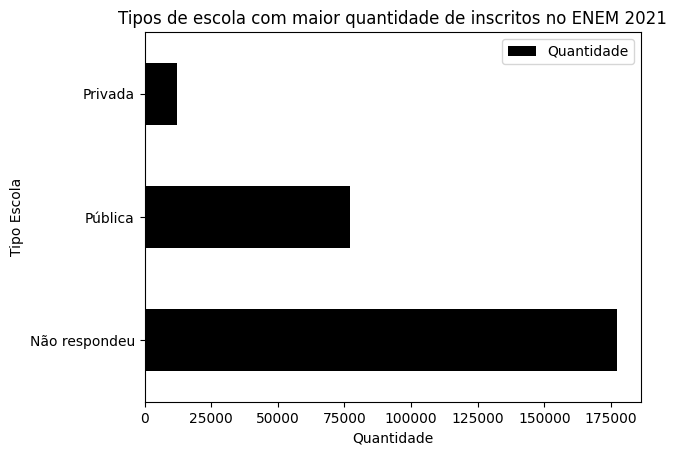

In [105]:
(
    df.TP_ESCOLA
    .map({1:'Não respondeu', 2:'Pública', 3:'Privada'})
    .value_counts()
    .reset_index()
    .rename(columns = {'index' : 'Tipo Escola', 'TP_ESCOLA': 'Quantidade'})
    .nlargest(n = 15, columns = 'Quantidade')
    .set_index('Tipo Escola')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = True,
        xlabel = 'Quantidade',
        title = 'Tipos de escola com maior quantidade de inscritos no ENEM 2021'
    )
);

Text(0.5, 1.0, 'Tipo escola dos participantes no ENEM 2021')

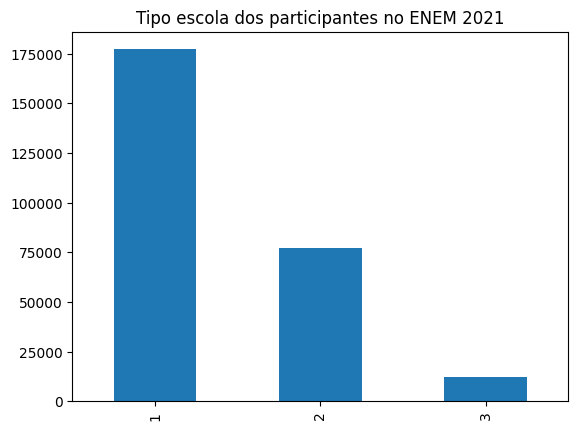

In [81]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola dos participantes no ENEM 2021')

<Axes: >

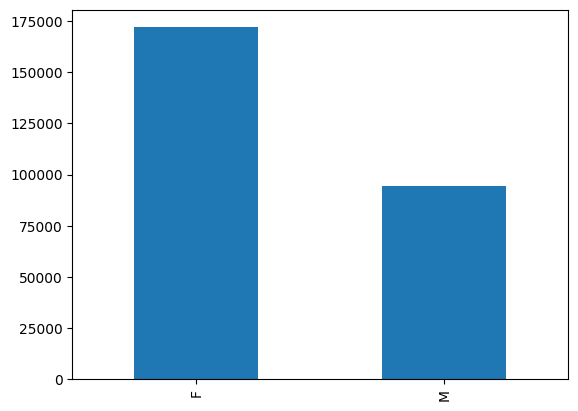

In [77]:
df.TP_SEXO.value_counts().plot(kind = 'bar')

Melhorando um pouco o plot:

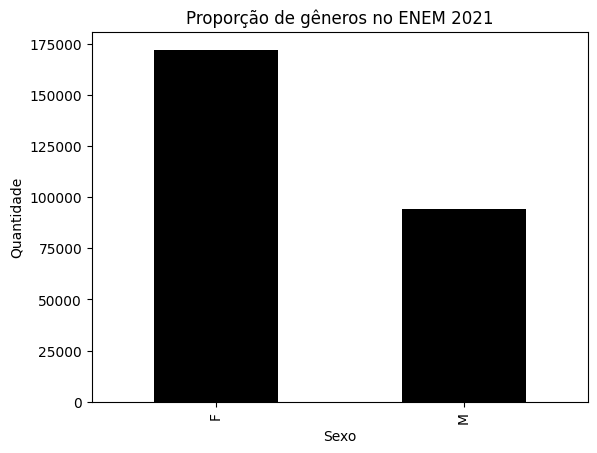

In [78]:
# gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')
# título
plt.title('Proporção de gêneros no ENEM 2021')
# label do eixo x
plt.xlabel('Sexo')
# label do eixo y
plt.ylabel('Quantidade')

plt.show()
#plt.xlabel('Sexo');plt.ylabel('Quantidade');plt.show()

In [ ]:
#df.NO_MUNICIPIO_PROVA\
#.value_counts()\
#.reset_index()

: 

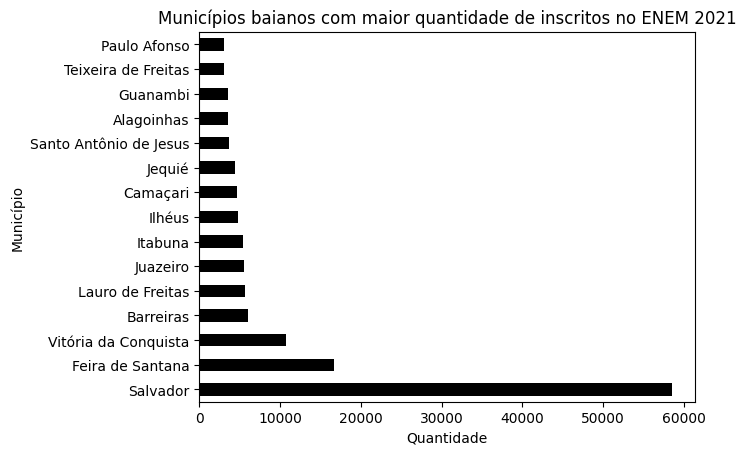

In [99]:
(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'index' : 'Município', 'NO_MUNICIPIO_PROVA': 'Quantidade'})
    .nlargest(n = 15, columns = 'Quantidade')
    .set_index('Município')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = False,
        xlabel = 'Quantidade',
        title = 'Municípios baianos com maior quantidade de inscritos no ENEM 2021'
    )
);

Gráfico de pizza

* Proporção entre os gêneros

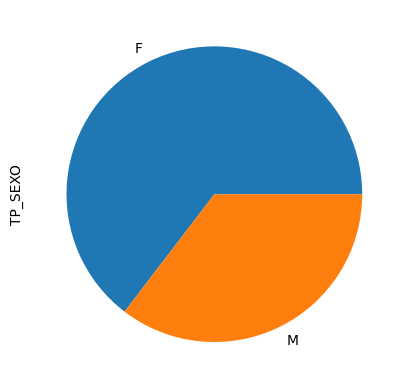

In [100]:
df.TP_SEXO.value_counts().plot(kind = 'pie');

* Tipo escola

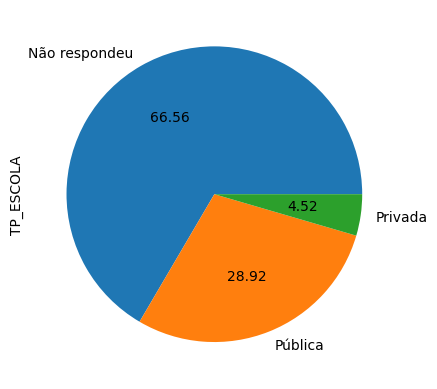

In [101]:
(
    df.TP_ESCOLA.map({1:'Não respondeu', 2:'Pública', 3:'Privada'})
    .value_counts()
    .plot(kind = 'pie',
          legend = False,
          autopct = '%.2f'
         )
);

Gráfico de dispersão das notas de Matemática e Ciências da Natureza:

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

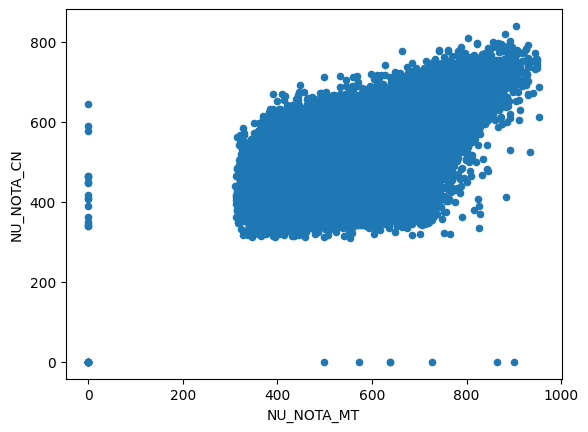

In [106]:
df.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

Histograma

<Axes: ylabel='Frequency'>

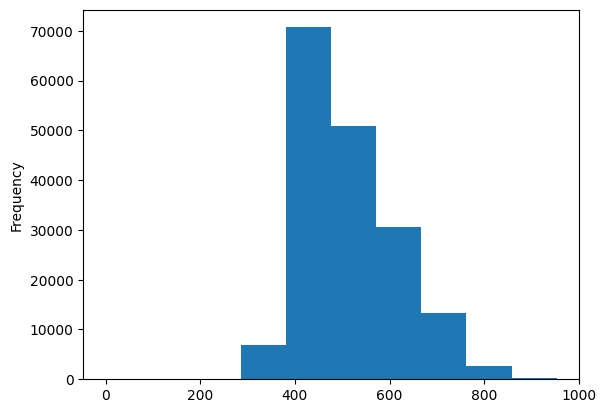

In [107]:
df.NU_NOTA_MT.plot(kind = 'hist')

Boxplot

<Axes: >

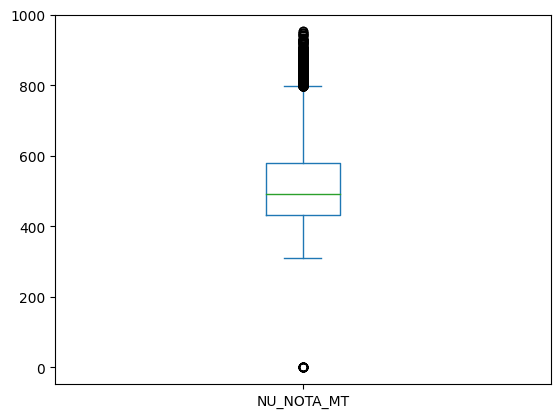

In [108]:
df.NU_NOTA_MT.plot(kind = 'box')

<Axes: >

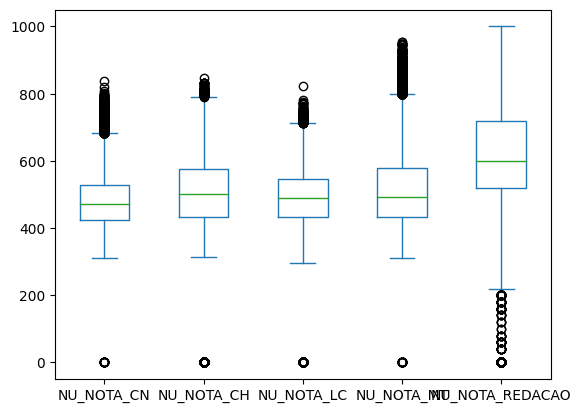

In [109]:
df[provas].plot(kind = 'box')

Kde (densidade)

<Axes: ylabel='Density'>

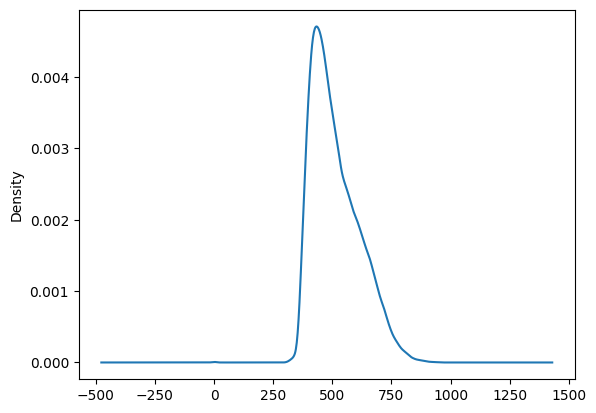

In [110]:
df.NU_NOTA_MT.plot(kind = 'kde')

Gráfico de linhas

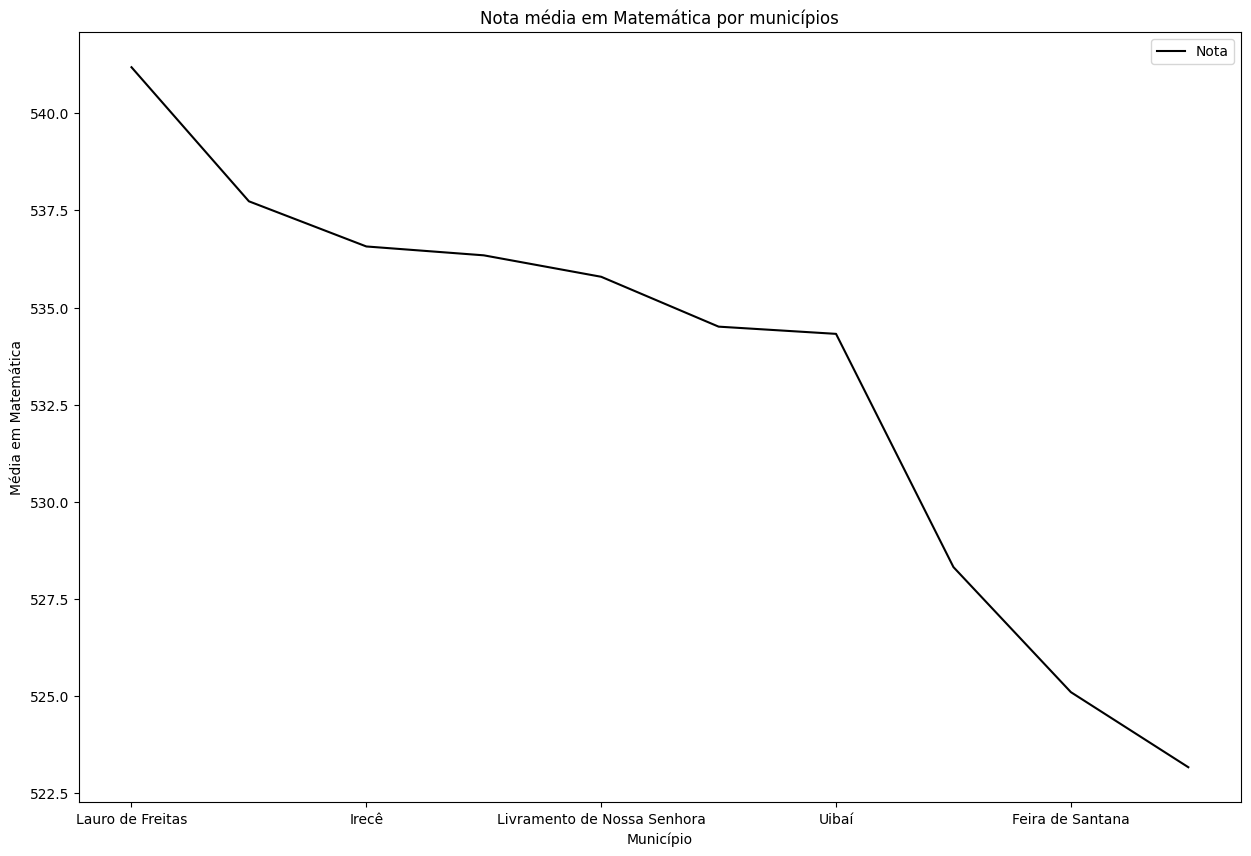

In [111]:
(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns = {'NU_NOTA_MT' : 'Nota', 'NO_MUNICIPIO_PROVA': 'Município'})
    .nlargest(n = 10, columns = 'Nota')
    .plot(
        x       = 'Município',
        y       = 'Nota',
        figsize = (15, 10),
        color   = 'k',
        ylabel  = 'Média em Matemática',
        title   = 'Nota média em Matemática por municípios',
        #ylim    = [520, 545]

    )

);

### Ordenação

Em alguns casos precisamos ordenar os dados por alguma coluna ou conjunto de colunas. No Pandas podemos utilizar a função `.sort_values()`.

In [112]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

In [116]:
df_subset = df[idCandidato+provas].sample(n = 10, random_state = 9999)

In [117]:
# ordena o dataset em ordem decrescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [118]:
# ordena o dataset em ordem crescente
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = True)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
171654,210051356897,468.6,500.2,422.8,354.5,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
227398,210051715408,590.7,665.7,559.3,729.0,720.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


Podemos definir onde queremos inserir os valores ausentes com `na_position`.

In [119]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'first', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0


In [120]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'last', ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


Podemos efetuar a ordenação por mais de uma coluna:

In [121]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = [False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


Podemos ainda aplicar a função `.sort_values()` para uma Series, neste caso não precisamos especificar o argumento `by`:

In [122]:
type(df.NU_NOTA_MT)

pandas.core.series.Series

In [123]:
df_subset.NU_NOTA_MT.sort_values()

171654    354.5
53444     424.8
212050    427.3
451       460.8
168634    493.1
171946    582.4
124717    582.6
227398    729.0
255118      NaN
57913       NaN
Name: NU_NOTA_MT, dtype: float64

In [124]:
df_subset.NU_NOTA_MT.sort_values(ascending = True, na_position = 'first')

255118      NaN
57913       NaN
171654    354.5
53444     424.8
212050    427.3
451       460.8
168634    493.1
171946    582.4
124717    582.6
227398    729.0
Name: NU_NOTA_MT, dtype: float64

Em alguns casos estamos interessados em criar um ranking. Vamos filtra a base para os candidatos que fizeram a prova em Salvador e posteriormente criar um top 10 na prova de Matemática.

In [125]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato+provas]

In [126]:
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
266183,210053939844,NaN,NaN,NaN,NaN,NaN
266188,210054023670,463.8,474.9,333.3,357.8,280.0
266191,210051995005,NaN,NaN,NaN,NaN,NaN
266192,210053234415,NaN,NaN,NaN,NaN,NaN


In [127]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[:11, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


Outra forma de fazer isso seria utilizando a função `nlargest` (para análise contrária podemos usar a função `nsmallest`):

In [128]:
df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
50793,210051245410,717.1,774.0,669.3,926.8,920.0


Podemos ainda analisar por mais de 1 coluna:

In [129]:
df_subset.sort_values(by = ['NU_NOTA_MT', 'NU_NOTA_CN'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [131]:
# caso houvesse duplicidade poderíamos passar o argumento keep
# keep = first : take the first occurrence.
# keep = last : take the last occurrence.
# keep = all : do not drop any duplicates, even it means selecting more than n items.
df_subset.nlargest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


Ranking com os alunos que obtiveram as menores notas em Matemática e Ciências da Natureza:

In [130]:
df_subset.nsmallest(n = 10, columns = ['NU_NOTA_MT', 'NU_NOTA_CN'], keep = 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
216695,210054207985,0.0,328.9,364.2,0.0,0.0
237823,210054207908,0.0,389.1,343.9,0.0,820.0
237883,210052783728,339.7,749.7,723.1,0.0,440.0
256745,210051948246,343.3,403.4,337.4,0.0,0.0
151627,210053516497,389.2,0.0,328.7,0.0,0.0
36728,210052910938,448.4,0.0,366.3,0.0,600.0
99541,210052413138,461.9,340.8,381.5,0.0,620.0
40997,210053204001,577.5,611.7,637.3,0.0,740.0
263890,210053484663,426.6,502.8,516.5,315.3,600.0
264672,210051870014,421.6,513.2,483.5,315.4,480.0


**Índice**

A indexação do Pandas conta as linhas e colunas a partir do zero, mas podemos alterar o índice default do DataFrame e ainda ordenar um DataFrame de acordo com seu índice. Em séries temporais alterar o índice default pode facilitar o trabalho de filtro de datas.

* set_index()

In [132]:
df_subset.set_index('NU_INSCRICAO', inplace = True)

In [133]:
df_subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210054173438,NaN,NaN,NaN,NaN,NaN
210053741476,453.4,438.3,503.4,379.5,600.0
210054171092,NaN,NaN,NaN,NaN,NaN
210053702687,603.3,622.5,571.7,729.2,860.0
210054087112,414.6,420.5,368.6,399.4,480.0


* sort_index()

In [134]:
# ordena o dataset de acordo com o índice
df_subset.sort_index().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210051014333,NaN,NaN,NaN,NaN,NaN
210051014348,NaN,NaN,NaN,NaN,NaN
210051014437,NaN,NaN,NaN,NaN,NaN
210051014463,NaN,NaN,NaN,NaN,NaN
210051014490,596.3,615.3,628.1,621.6,700.0


Podemos escolhar mais de uma coluna como índice do DataFrame, com efeito criamos um MultiIndex.

In [135]:
df_test = df.copy().sample(10)
df_test = df_test.set_index(['NO_MUNICIPIO_PROVA', 'TP_SEXO'])

In [136]:
df_test

,,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NO_MUNICIPIO_PROVA,TP_SEXO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Itabuna,F,210053750734,2021,5,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,715.4,570.0,588.5,618.7,ACCDCBBBBECABCACCCBAABCEADBBEBEBEEBBBCABEDEEE,BDCBBCBBBEDCDBBDDAEABCCDBABABCDEAECCBABBAAEDB,CADBC99999BAADDADEEDBADDDABBAECEADEBDCBDBBCACC...,DBBCDDBEECDCABCCCDABADCABBDCCBCCBCCDCCECBCDEE,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,200.0,200.0,160.0,920.0
Ilhéus,M,210053738771,2021,5,1,1,1,2,0,2,1.0,0,2913606.0,Ilhéus,29.0,BA,2.0,1.0,1.0,2913606,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,397.3,397.3,496.1,455.2,DBEECCCADEDAAEDBDBDDCECBCBAEBCEEABBDEBAABAACD,EACCACADCBEDACABDCABECBDAECABDBBAACDBEBACDBDB,99999CCBEABBEECEECEABCDBADBCDEBEBCAACBDEBCDAEE...,CBCBCBCDDBDDABCCBDCDBCCDBDDCBEBCACEBCCDBBCCDA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,140.0,120.0,140.0,120.0,640.0
Caetité,F,210051292356,2021,1,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905206,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,495.5,501.0,489.8,617.1,DDDBADEDAECCECBBCBDCBECCAEBDCBEDBCAEECBDDDADE,EDEBCAEABAEBEACCEBABCBBEAACABEABCBBDCDEBBABBB,DDBAA99999CDADDEEEDCAEBAAAADDEABBEEDEBDAACDDCB...,DACEAADDCCACBBACAEAACBBEAAEDCABDCDCEBCCAEBDCB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,140.0,120.0,120.0,80.0,560.0
Itapetinga,F,210052747767,2021,3,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2916401,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barreiras,F,210054178610,2021,3,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,29,BA,0,1,1,0,NaN,881.0,892.0,NaN,NaN,405.2,334.0,NaN,NaN,ABACEDAAABACDAABDCDABCBECDBCDBAACECDDBACBEDAB,99999DBADCABEBACDBACDBABAECCDADBABADBDCDCBDAEB...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,120.0,80.0,100.0,120.0,0.0,420.0
Salvador,M,210052583695,2021,6,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paripiranga,F,210051201580,2021,7,1,1,1,2,0,2,1.0,0,2923803.0,Paripiranga,29.0,BA,2.0,1.0,1.0,2923803,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,444.9,396.9,478.3,449.5,BCBBDCBDBCDCCBDCCAEDDACCBCCDCBCBECDCBBBAAADDA,BADDBBAABACDBCABDBDCEECBCCBABBBCBCCCDCBDBCBBA,99999CADEAEBACEACBEBADEDCDBCEABDCACABBBDDEBECD...,BABCBCCDCBBCCCCCCACCCABBCCCCBBABACCBAACCDCCEA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,120.0,80.0,80.0,40.0,420.0
Ibotirama,F,210051508322,2021,6,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913200,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,493.4,482.2,420.2,583.0,EADDCBECCCBDBDACCBCABECAEBCBEC

In [137]:
type(df_test.index)

pandas.core.indexes.multi.MultiIndex

* reset_index()

Para retornar ao dataset original:

In [138]:
df_subset = df_subset.reset_index(drop = False)

In [139]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210054173438,NaN,NaN,NaN,NaN,NaN
1,210053741476,453.4,438.3,503.4,379.5,600.0
2,210054171092,NaN,NaN,NaN,NaN,NaN
3,210053702687,603.3,622.5,571.7,729.2,860.0
4,210054087112,414.6,420.5,368.6,399.4,480.0


### Agregação/Sumarização

Nesta seção vamos aprender a aplicar medidas para sumarizar dados, tais como soma, contagem, média, mediana, etc.

Em geral para aplicar uma função de agregação em uma coluna a sintaxe será :

```python
df.column.agg_function()
```


Função|Descrição
------|----------
df.sum()|Soma
df.count()|Contagem
df.abs()|Valor absoluto
df.cumsum()|Soma cumulativa
df.cumprod()|Produto cumulativo
df.min()|Mínimo
df.max()|Máximo
df.mean()|Média
df.median()|Mediana
df.mode()|Moda
df.var()|Variância
df.std()|Desvio Padrão
df.mad()|Desvio Médio Absoluto
df.skew()|Medida de Assimetria da Distribuição
df.kurtosis()|Curtose
df.corr()|Correlação
df.cov()|Covariância
df.quantile()|Quantil

Agora vejamos alguns exemplos:

In [ ]:
# média das provas
df[provas].mean()

: 

In [ ]:
# moda da variável sexo
df['TP_SEXO'].mode()

: 

A função `.agg()` permite aplicar mais de uma função de agregação ou operações ao longo dos eixos.
Aggregate using one or more operations over the specified axis. Neste caso podemos inserir funções de agregação do NumPy.

In [ ]:
# valor máximo das provas
# df[provas].agg(max)
df[provas].agg(np.max)

: 

Para aplicar mais de uma função de agregação podemos passar uma lista contendo todas as agregações desejadas:

In [ ]:
df[provas].agg([np.min, np.max, np.mean])

: 

Podemos mudar o eixo de aplicação das funções de agregaçaõ. Isto é, podemos aplicar uma soma nas linhas ou nas colunas, por exemplo.

In [ ]:
# média das colunas
df[provas].mean(axis = 0)

: 

In [ ]:
# média das linhas
df[provas].mean(axis = 1)

: 

Observe que no primeiro caso nosso objetivo foi analisar a média geral dos alunos da amostra. No segundo caso, fizemos o cálculo da média de cada aluno nas provas.

Em alguns casos estamos interessados em obter o valor máximo, mas também obter a linha deste registro. Idem para o mínimo. Neste caso, podemos usar as funções `idxmin()` e `idxmax()`. Para séries temporais tal análise é importante, pois conseguimos obter, por exemplo, a data de ocorrência do valor máximo ou mínimo.

In [ ]:
# valor máximo, índice de ocorrência do valor máximo
df.NU_NOTA_MT.max(), df.NU_NOTA_MT.idxmax()

: 

In [ ]:
# verifica o resultado anterior
df.iloc[df.NU_NOTA_MT.idxmax(), ]

: 

### Transformação de dados

Nesta seção vamos aprender algumas técnicas de transformação dos dados.

In [ ]:
df_ssa = df[df.NO_MUNICIPIO_PROVA == 'Salvador'][idCandidato+provas].sample(10, random_state = 10)

: 

Vamos criar duas novas colunas:
* Média das provas Objetivas
* Média Global


Vejamos algumas formas distintas de alcançar este objetivo.

In [ ]:
provas_objetivas = provas.copy()
provas_objetivas.remove('NU_NOTA_REDACAO')

: 

Uma forma de fazer isso seria:

In [ ]:
df_ssa['NU_MEDIA_OBJ_1'] = (df_ssa['NU_NOTA_CN']+df_ssa['NU_NOTA_CH']+df_ssa['NU_NOTA_LC']+df_ssa['NU_NOTA_MT'])/4

: 

In [ ]:
df_ssa['NU_MEDIA_OBJ_1']

: 

Usando função de agregação:

In [ ]:
df_ssa[provas_objetivas].mean(axis = 1)

: 

In [ ]:
df_ssa[provas_objetivas].agg(func = np.mean, axis = 1)

: 

Uma pequena diferença se usarmos uma lista dentro do argumento `func`:

In [ ]:
df_ssa[provas_objetivas].agg(func = [np.mean], axis = 1)

: 

Outra forma de fazermos isso seria utilizando a função `pd.eval()` ou ainda a função `assign`:

In [ ]:
df_ssa.eval('(NU_NOTA_CN+NU_NOTA_CH+NU_NOTA_LC+NU_NOTA_MT) / 4')

: 

In [ ]:
df_ssa.assign(media_obj = (df_ssa.NU_NOTA_MT+df_ssa.NU_NOTA_CN+df_ssa.NU_NOTA_LC+df_ssa.NU_NOTA_CH) / 4)

: 

Em algumas análises podemos tomar o log de uma determinada variável, veremos mais sobre isso na aula de Estatística Básica.

In [ ]:
np.log(df_ssa.NU_NOTA_MT)

: 

In [ ]:
df_ssa = df_ssa.assign(
    log_nota_mt = lambda col: np.log(col.NU_NOTA_MT) ,
    log_nota_cn = lambda col: np.log(col.NU_NOTA_CN) ,
    log_nota_ch = lambda col: np.log(col.NU_NOTA_CH) ,
    log_nota_lc = lambda col: np.log(col.NU_NOTA_LC)
             )

: 

Podemos usar ainda a função `.apply()`:

In [ ]:
df_ssa[provas_objetivas].apply(lambda col: np.log(col))

: 

Aplicando funções

**map()**
* percorre item por item e aplica uma função desejada.

Neste exemplo, vamos percorrer cada valor de renda e aplicar a função np.log().


In [ ]:
df.query('NU_NOTA_MT != 0').NU_NOTA_MT.map(np.log)

: 

Podemos usar a funçaõ `map()` para transformar variáveis. Na coluna TP_COR_RACA temos informações de cor/raça do candidato.

In [ ]:
# 0 : Não declarado
# 1 : Branca
# 2 : Preta
# 3 : Parda
# 4 : Amarela
# 5 : Indígena

: 

In [ ]:
np.sort(df.TP_COR_RACA.unique())

: 

In [ ]:
mapear_valores_cor_raca = {
    0 : 'Não declarado',
    1 : 'Branca',
    2 : 'Preta',
    3 : 'Parda',
    4 : 'Amarela',
    5 : 'Indígena'
}

: 

In [ ]:
df.TP_COR_RACA.map(mapear_valores_cor_raca)

: 

Podemos usar também a função replace:

In [ ]:
df.TP_SEXO.replace({'M': 'Masculino', 'F' : 'Feminino'})

: 

**apply()**
* podemos aplicar uma função em todas as linhas ou em todas as colunas (ou seja, aplica uma função em um determinado eixo).

In [ ]:
def resultado_candidato(nota):
    if nota < 600 :
        return 'Reprovado'
    else:
        return 'Aprovado'

: 

In [ ]:
df[df.NU_NOTA_MT.notna()].NU_NOTA_MT.apply(resultado_candidato)

: 

Podemos usar `apply()` para transformar uma coluna:

In [ ]:
def mapear_tipo_escola(tipo_escola):
    if tipo_escola == 1:
        return 'Não respondeu'
    elif tipo_escola == 2:
        return 'Pública'
    else:
        return 'Privada'

: 

In [ ]:
df.TP_ESCOLA.apply(mapear_tipo_escola)

: 

In [ ]:
df.TP_SEXO.apply(lambda col: 'Masculino' if col == 'M' else 'Feminino')

: 

### Agrupamento

Anteriormente aprendemos a aplicar funções de agregação de forma genérica para uma ou mais variáveis. Algo muito como quando estamos analisando dados é obter tais medidas agrupadas. Ou seja, qual a média da prova de matemática por gênero?

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" height=400 width=400>

O flow é o seguinte:
* `split`: os dados são separados de acordo com seus grupos (A, B, C).
* `apply`: após o split aplica-se a função de agregação desejada, neste caso a função sum().
* `combine`: o resultado final é combinado.

Então note que, após separar os grupos e aplicar a soma para cada grupo, obtemos um dataset final com o resultado desta operação (`split-apply-combine`).

Vamos usar esta seção para responder as seguintes perguntas:
* Qual a proporção de gênero entre os candidatos?
* Qual a média das provas por tipo de escola?


In [ ]:
# grupos
df.groupby(by = ['TP_SEXO']).groups

: 

In [ ]:
# proporção de gênero
df.groupby(by = ['TP_SEXO'])[idCandidato].count()

: 

De forma análoga poderíamos usar a função `.value_counts()`, que retorna a distribuição de frequências da variável.

In [ ]:
df.TP_SEXO.value_counts()

: 

Agora vamos criar uma nova coluna no nosso dataset original, para mapear os valores numéricos em suas respectivas categorias. Seguidamente vamos verificar a nota média nas provas por tipo de escola.

In [ ]:
df['TP_ESCOLA_CAT'] = df.TP_ESCOLA.map({1 : 'Não respondeu', 2: 'Pública', 3: 'Privada'})

: 

In [ ]:
df.groupby(by = ['TP_ESCOLA_CAT'])[provas].agg(np.mean).sort_values(by = ['NU_NOTA_MT'], ascending = False)

: 

In [ ]:
# A maior parcela dos alunos são da categoria Não respondeu.
np.multiply(df['TP_ESCOLA_CAT'].value_counts(normalize = True), 100).round(2)

: 

Para não comprometer nossa análise vamos remover a categoria Não respondeu.

In [ ]:
# distribuição de frequências em termos absolutos
df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = False)

: 

In [ ]:
# distribuição de frequências em termos relativos
np.multiply(df.query('TP_ESCOLA_CAT != "Não respondeu"')['TP_ESCOLA_CAT'].value_counts(normalize = True),
            100)\
.round()

: 

Para evitar repetição e construir um código mais limpo poderíamos fazer da seguinte forma:

In [ ]:
subset_tp_escola = df[df.TP_ESCOLA_CAT != 'Não respondeu']
# distribuição de frequência em termos relativos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = True))
# distribuição de frequência em termos absolutos
display(subset_tp_escola.TP_ESCOLA_CAT.value_counts(normalize = False))

: 

Agora vamos obter a média das notas por tipo de escola:

In [ ]:
subset_tp_escola\
.groupby(by = ['TP_ESCOLA_CAT'])[provas]\
.agg(np.mean)\
.sort_values(by = ['NU_NOTA_MT'], ascending = False)

: 

Utilizaremos agora mais de uma coluna para agrupar a nossa amostra e aplicaremos várias funções de agregação.

In [ ]:
# análise apenas para a prova de matemática
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'], as_index = False)['NU_NOTA_MT']
    .agg([np.mean])
)

: 

In [ ]:
# análise para todas as provas
(subset_tp_escola
 .groupby(by = ['TP_ESCOLA_CAT', 'TP_LOCALIZACAO_ESC'])[provas]
 .agg([np.min, np.mean, np.median, np.std, np.max])
 .transpose()
)

: 

Com a função `.agg()` conseguimos também aplicar funções de agregação distintas para cada coluna:

In [ ]:
(
    subset_tp_escola
    .groupby(by = ['TP_ESCOLA_CAT'])
    .agg(
        {
            'NU_NOTA_MT': [np.mean, np.median],
            'NU_NOTA_CN': [np.min, np.max]
        }

        )
)

: 

### Join e concat

***


No Pandas `pd.merge()` é uma função utilizada para unir datasets por meio de uma coluna que seja comum para ambos. Frequentemente precisamos consultar dados em várias tabelas e consolidar em uma tabela final. Vamos imaginar que precisamos construir uma tabela com dados cadastrais dos clientes de uma empresa. Provável que estes dados estejam espalhados ao longo de várias tabelas.

Exemplo:

* tb_cadastro
* tb_celular
* tb_endereco
* tb_tempo_relacionamento

Comum a todas as tabelas será provavelmente alguma coluna como o id do cliente (primary key). Desta forma, para consolidar todas as informações cadastrais dos clientes em uma única tabela precisaríamos percorrer várias tabelas e fazer um join. Ocorre ainda a possibilidade de termos que consolidar outros dados por meio de transformação de variáveis e consolidar nesta tabela cadastral, pense por exemplo se a necessidade fosse conta quantas compras este consumidor fez no último mês.


Vejamos os principais parâmetros da função merge (neste caso em ambos os datasets, temos que o nome da coluna em comum seja o mesmo):

```python
df_left.merge(df_right, on = 'column', how = 'left|right|outer|inner')
```

Caso o nome da coluna em comum seja distinta entre os datasets então teríamos:


```python
df_left.merge(df_right, left_on = 'column_left', right_on = 'column_right', how = 'inner')
```


Tipos de joins

<img src = 'https://datascience.quantecon.org/_images/merge_venns.png' width = 400 />


Vejamos agora exemplos práticos.

In [ ]:
customer_1 = pd.DataFrame({
    'id_customer': [1, 2, 3, 4, 5],
    'occupation': ['Data Scientist', 'Economist', 'Data Scientist', 'Data Engineer', 'Data Scientist']
})

: 

In [ ]:
customer_2 = pd.DataFrame({
    'id_customer': [2, 3, 4, 5],
    'experience': [10, 3, 2, 4]
})

: 

In [ ]:
display(customer_1, customer_2)

: 

In [ ]:
pd.merge(customer_1, customer_2)

: 

In [ ]:
customer_merged = pd.merge(customer_1, customer_2, on = 'id_customer', how = 'inner')

: 

In [ ]:
customer_merged

: 

In [ ]:
customer_3 = pd.DataFrame({
    'id_customer': [2, 3, 5, 8],
    'State': ['BA', 'SP', 'SP', 'RJ']
})

: 

In [ ]:
pd.merge(customer_merged, customer_3, on = 'id_customer')

: 

In [ ]:
customer_4 = pd.DataFrame({
    'id_customer': [2, 2, 2, 5, 5],
    'order_date': [2019, 2020, 2022, 2017, 2022]
})

: 

In [ ]:
pd.merge(customer_merged, customer_4)

: 

In [ ]:
customer_5 = pd.DataFrame({
    'customer_number': [1, 2, 3, 4, 5, 10, 11, 12, 13],
    'age': [40, 33, 27, 35, 39, 44, 25, 23, 29]
})

: 

In [ ]:
pd.merge(customer_1, customer_5, left_on = 'id_customer', right_on = 'customer_number', how = 'inner')\
.drop(columns = 'customer_number')

: 

In [ ]:
customer_1_modified = customer_1.set_index('id_customer')

: 

In [ ]:
customer_2_modified = customer_2.set_index('id_customer')

: 

In [ ]:
pd.merge(
    customer_1_modified,
    customer_2_modified,
    left_index = True,
    right_index = True,
)\
.reset_index()

: 

In [ ]:
customer_1_modified.join(customer_2_modified, how = 'inner')

: 

In [ ]:
order = pd.DataFrame({'id_customer': [3, 5],
                      'order_name': ['Book', 'Car']
                     })

: 

In [ ]:
customer_1

: 

In [ ]:
pd.merge(customer_1, order, how = 'inner')

: 

In [ ]:
pd.merge(order, customer_1, how = 'left')

: 

In [ ]:
pd.merge(order, customer_1, how = 'right').fillna(0)

: 

In [ ]:
pd.merge(order, customer_1, how = 'outer')

: 

***

Agora vamos voltar aos dados do ENEM e fazer um join da nossa base com a base que possui informações socioeconômicas.

In [ ]:
economic_data = pd.read_csv('dados_enem_2021_BA_questoes_socieconomicas.csv')

: 

In [ ]:
economic_data.head()

: 

In [ ]:
df.shape

: 

In [ ]:
df_merged = df.merge(economic_data, on = 'NU_INSCRICAO', how = 'inner')

: 

In [ ]:
df_merged.shape

: 

In [ ]:
df_merged.head()

: 

### **Principais funções e comandos do Pandas**

**Insepação de dados**

```python
df.head()

df.tail()

df.shape

df.info()

df.dtypes
```

**Manipulação de dados**
```python

# seleção de colunas

df.iloc[:, :]

df.loc[:, :]

# criação de colunas
df['new_column_1'] = (df['old_column'] / df['A'] * 100)
df_new = df.assign(new_column_2 = df['old_column'] * 5)

# remoção de colunas
df.drop(columns = ['column_1', 'column_2'])

# filtro

df.query('(column_A == 1) & (column_B != "value")')

df[(df.column_A == 1) | (df.column_B != 'value')]

df.loc[(df.column_A <= 2) & (df.column_C > 10)]



```



**Leitura de dados**

```python

pd.read_csv(filepath, sep, header, index_col, skiprows, na_values)

```

**Sumarização de dados**
```python
df.describe(include = 'all')
```

**Visualização de dados**

```python

# bar plot
df.column.value_counts().plot(kind = 'bar')

# pie plot
df.column.value_counts().plot(kind = 'pie')

# box plot
df.column.plot(kind = 'box')
```




